<a href="https://colab.research.google.com/github/abduqodir-pulatov/3_module_imtihon/blob/main/3_module_final_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


In [ ]:
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:

dataset_path = "/kaggle/input/animals10/raw-img"

categories = os.listdir(dataset_path)

images = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(category_path, filename)
                try:
                    img = Image.open(img_path)
                    images.append(img)
                    labels.append(category)
                except Exception as e:
                    print(f"Could not open image {img_path}: {e}")

print(f"Loaded {len(images)} images with {len(labels)} labels.")

Loaded 1919 images with 1919 labels.


In [ ]:
X, Y, target_names = images, labels, categories

In [ ]:
def convert_bytes_to_numbers(image):
    img = image.convert('L') # Convert to grayscale
    img = img.resize((224, 224)) # Resize to a common size (e.g., 224x224)
    img = np.asarray(img) # Convert to NumPy array
    img = img.flatten() # Flatten the array
    return img

In [ ]:
xs = np.array([convert_bytes_to_numbers(x) for x in X])

In [ ]:
xs[0]

array([44, 45, 47, ..., 80, 83, 87], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(xs, Y, test_size=0.2)

In [ ]:
svm = SVC(C=1.0, kernel='linear')
svm.fit(X_train, Y_train)

In [ ]:
y_pred = svm.predict(X_test)
y_pred

array(['elefante', 'pecora', 'farfalla', 'pecora', 'farfalla', 'farfalla',
       'elefante', 'elefante', 'ragno', 'farfalla', 'ragno', 'pecora',
       'pecora', 'pecora', 'ragno', 'farfalla', 'elefante', 'pecora',
       'ragno', 'elefante', 'farfalla', 'gatto', 'ragno', 'farfalla',
       'ragno', 'ragno', 'ragno', 'gatto', 'elefante', 'farfalla',
       'gatto', 'ragno', 'ragno', 'ragno', 'ragno', 'pecora', 'gatto',
       'gatto', 'ragno', 'ragno', 'farfalla', 'ragno', 'ragno',
       'elefante', 'ragno', 'gatto', 'ragno', 'ragno', 'elefante',
       'gatto', 'elefante', 'elefante', 'elefante', 'ragno', 'ragno',
       'elefante', 'farfalla', 'ragno', 'gatto', 'ragno', 'elefante',
       'farfalla', 'gatto', 'ragno', 'ragno', 'pecora', 'farfalla',
       'pecora', 'pecora', 'ragno', 'pecora', 'gatto', 'elefante',
       'ragno', 'gatto', 'farfalla', 'gatto', 'gatto', 'gatto', 'gatto',
       'farfalla', 'gatto', 'ragno', 'farfalla', 'ragno', 'ragno',
       'elefante', 'gatto', 'e

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred)
acc

0.3098958333333333

In [ ]:
test_image1 = X_test[8]

array([[169, 153,  92, ..., 118, 115, 123],
       [ 97, 153, 146, ..., 113, 106, 115],
       [ 83, 121, 146, ...,  95, 107, 113],
       ...,
       [ 87,  96, 123, ..., 101, 182, 159],
       [102, 105, 116, ..., 135, 190, 188],
       [ 95, 108, 121, ..., 157, 204, 192]], dtype=uint8)
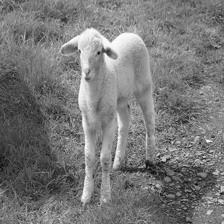

In [ ]:
org_image = test_image1.reshape(224, 224)
org_image

In [ ]:
result = svm.predict([test_image1])
result

array(['pecora'], dtype='<U8')

In [ ]:
predicted_class_index = target_names.index(result[0])
print(f"Predict nom: {target_names[predicted_class_index]}")

Predict nom: pecora


In [ ]:
import joblib
joblib.dump(svm, "svm_model.pkl")

['svm_model.pkl']

In [ ]:
model = joblib.load("svm_model.pkl")


In [ ]:
model

SVC(kernel='linear')

In [ ]:
import gradio as gr


demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs=gr.Textbox(label="Predicted Animal"),
    title="SVM Animal Image Classifier",
    description="Upload an image of an animal to get a prediction from the trained SVM model."
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ceee9e4df417022c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
label_names = categories
print(label_names)

['cavallo', 'pecora', 'elefante', 'gatto', 'scoiattolo', 'gallina', 'ragno', 'mucca', 'cane', 'farfalla']


In [ ]:
from PIL import Image
import gradio as gr

# Assume you already have a trained model and label names
# Example:
# model = joblib.load("svm_model.pkl")
# label_names = ["Cat", "Dog", "Horse", ...]

def predict_image(img):
    # Convert numpy array to PIL Image
    img = Image.fromarray(img.astype('uint8'), 'RGB')

    # Resize image to 224x224
    img_resized = img.resize((224, 224))

    # Flatten and reshape for model input
    img_flat = np.array(img_resized).flatten().reshape(1, -1)

    # Make prediction
    pred = model.predict(img_flat)[0]

    return f"Model taxmini: {label_names[pred]}"

# Create Gradio interface
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy", label="Rasm yuklang"),
    outputs=gr.Textbox(label="Natija"),
    title="SVM Image Classifier",
    description="SVM yordamida rasm klassifikatsiyasi"
)

# Launch app
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b0fbc38430c65a46d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
!pip install kagglehub gradio joblib

In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import gradio as gr
import matplotlib.pyplot as plt
import kagglehub

In [3]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:28<00:00, 21.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [4]:
dataset_path = os.path.join(path, "raw-img")

In [5]:
categories = os.listdir(dataset_path)
print("Kategoriyalar:", categories)

images = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.lower().endswith(".jpg"):
                img_path = os.path.join(category_path, filename)
                try:
                    img = Image.open(img_path)
                    images.append(img)
                    labels.append(category)
                except Exception as e:
                    print(f"Xatolik {img_path} da: {e}")

print(f"Yuklangan rasmlar soni: {len(images)} | Label soni: {len(labels)}")


Kategoriyalar: ['ragno', 'gatto', 'gallina', 'scoiattolo', 'farfalla', 'mucca', 'pecora', 'cane', 'elefante', 'cavallo']
Yuklangan rasmlar soni: 1919 | Label soni: 1919


In [6]:
def convert_bytes_to_numbers(image):
    img = image.convert('L')  # Grayscale
    img = img.resize((64, 64))  # Kattaroq rasmlar juda og‘ir, 64x64 yetarli
    img = np.asarray(img)
    img = img.flatten()
    return img

In [7]:

X = np.array([convert_bytes_to_numbers(x) for x in images])
Y = np.array(labels)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
svm = SVC(C=1.0, kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print("Model aniqligi:", acc)

Model aniqligi: 0.2916666666666667


In [11]:
joblib.dump(svm, "svm_model.pkl")
print("Model saqlandi: svm_model.pkl")

Model saqlandi: svm_model.pkl


In [12]:
test_image1 = X_test[8]
result = svm.predict([test_image1])[0]
print(f"Model taxmini: {result}")

Model taxmini: gatto


In [13]:
model = joblib.load("svm_model.pkl")
label_names = sorted(list(set(Y)))  # noyob label nomlari

def predict_image(img):
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = img.convert('L').resize((64, 64))
    img_flat = np.array(img).flatten().reshape(1, -1)
    pred = model.predict(img_flat)[0]
    return f"Model taxmini: {pred}"

demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy", label="Rasm yuklang"),
    outputs=gr.Textbox(label="Natija"),
    title="🐾 Hayvon rasmlarini SVM bilan aniqlash",
    description=f"SVM modeli yordamida hayvon rasmlarini klassifikatsiya qilish.\nModel aniqligi: {acc:.2f}"
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d51383b608cb80c878.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
